In [1]:
# Author: Dinesh Poudel

# Import libraries
import pandas as pd
import numpy as np
import os 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#define the input and output local computer file path
os.chdir("C:\\Users\\Dinesh Poudel\\Desktop\\Data Science\\Movie_Project")

In [3]:
# import dataset
df_movie=pd.read_csv("movie_metadata.csv")

In [4]:
#description of data
df_movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
#check data types
df_movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
# Select only needed columns from movie rating data. Columns removed after running several models
df= df_movie[[
'color',
'num_critic_for_reviews',
'duration',
'actor_1_facebook_likes',
'gross',
'genres',
'num_voted_users',
'cast_total_facebook_likes',
'facenumber_in_poster',
'num_user_for_reviews',
'actor_2_facebook_likes',
'imdb_score',
'movie_facebook_likes']]

In [7]:
# remove all rows with atleast 1 missing values
df_clean1=df.dropna()


In [8]:
#correlation of dataframe
df_clean1.corr()


,num_critic_for_reviews,duration,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.233676,0.181029,0.478501,0.602548,0.251851,-0.033686,0.577040,0.263247,0.330843,0.698632
duration,0.233676,1.000000,0.088387,0.247680,0.336207,0.124526,0.029780,0.348478,0.131267,0.345590,0.212799
actor_1_facebook_likes,0.181029,0.088387,1.000000,0.154313,0.190111,0.945717,0.064986,0.135222,0.392409,0.087578,0.136607
gross,0.478501,0.247680,0.154313,1.000000,0.635826,0.247102,-0.028099,0.558607,0.263254,0.197195,0.374035
num_voted_users,0.602548,0.336207,0.190111,0.635826,1.000000,0.261081,-0.029055,0.785398,0.255304,0.454952,0.523201
cast_total_facebook_likes,0.251851,0.124526,0.945717,0.247102,0.261081,1.000000,0.086671,0.193864,0.642363,0.098342,0.211627
facenumber_in_poster,-0.033686,0.029780,0.064986,-0.028099,-0.029055,0.086671,1.000000,-0.075704,0.072810,-0.074011,0.013143
num_user_for_reviews,0.577040,0.348478,0.135222,0.558607,0.785398,0.193864,-0.075704,1.000000,0.199687,0.306651,0.379865
actor_2_facebook_likes,0.263247,0.131267,0.392409,0.263254,0.255304,0.642363,0.072810,0.199687,1.000000,0.095046,0.236832
imdb_score,0.330843,0.345590,0.087578,0.197195,0.454952,0.098342,-0.074011,0.306651,0.095046,1.000000,0.269182


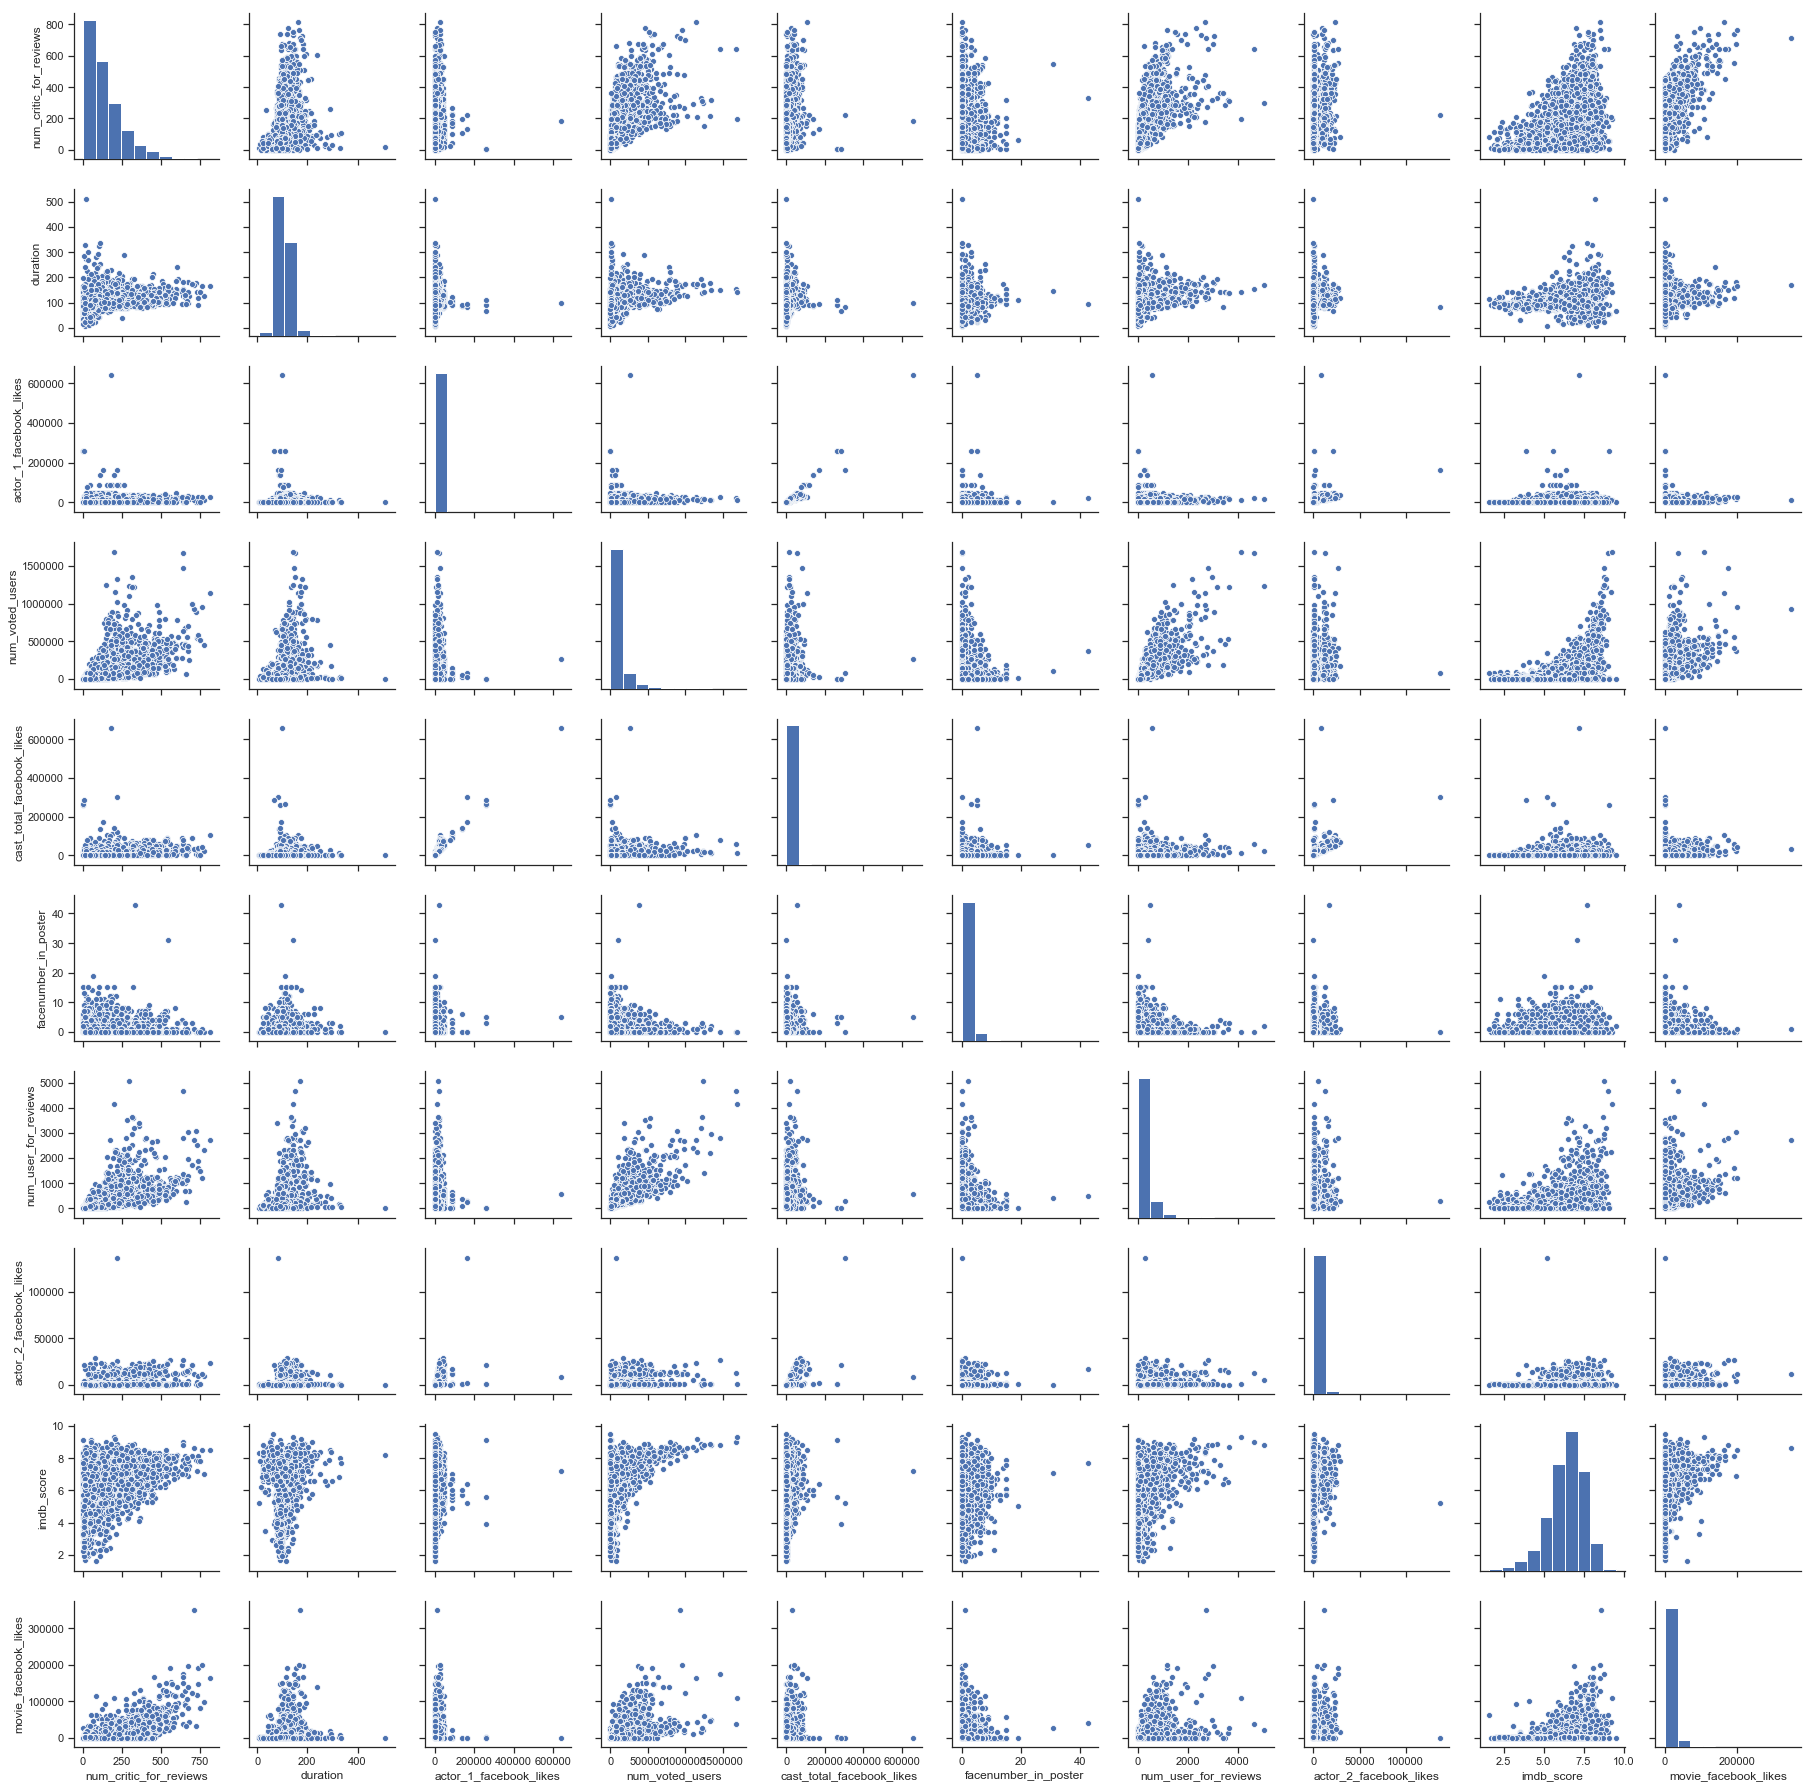

In [9]:
#scattermatrix to see any trends
sns.set(style="ticks")
df= df_movie[[
'num_critic_for_reviews',
'duration',
'actor_1_facebook_likes',
'num_voted_users',
'cast_total_facebook_likes',
'facenumber_in_poster',
'num_user_for_reviews',
'actor_2_facebook_likes',
'imdb_score',
'movie_facebook_likes']]

sns.pairplot(df)

In [10]:
#hot coding for dummy variables for categorical variables genres and color
genres_dummies =df_clean1["genres"].str.get_dummies("|").add_prefix("genres_")
color_dummies=df_clean1["color"].str.get_dummies().add_prefix("color_")

In [11]:
#combine dummies with the clean data set
df1 = pd.concat([df_clean1, genres_dummies,color_dummies], axis=1, sort=False)
df_clean=df1.drop(['color', 'genres'], axis=1)

In [12]:
#split our data set into the following parts
np.random.seed(1)
train, validate, test = np.split(df_clean.sample(frac=1), [int(.6*len(df_clean)), int(.8*len(df_clean))])
train_x= train.drop(['imdb_score'], axis=1)
train_y=train['imdb_score']
 
test_x= test.drop(['imdb_score'], axis=1)
test_y=test['imdb_score']

In [13]:
#linear regression
# train our algorithm
regressor = LinearRegression()  
results=regressor.fit(train_x, train_y) #training the algorithm


X2 = sm.add_constant(train_x)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

#test our algorithm
pred1 = results.predict(test_x)

#compare actual vs predicted values
df_output = pd.DataFrame({'Actual': test_y, 'Predicted': pred1})
df_output

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (metrics.mean_absolute_error(test_y, pred1) / test_y)
# Calculate and display accuracy
accuracy1 = 100 - np.mean(mape)
print('Accuracy of Linear Regression:', round(accuracy1, 2), '%.')

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     55.60
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.26e-268
Time:                        01:16:09   Log-Likelihood:                -2929.7
No. Observations:                2484   AIC:                             5927.
Df Residuals:                    2450   BIC:                             6125.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [14]:
# random forest model
model = RandomForestRegressor()
model.fit(train_x,train_y)

# Get the mean absolute error on the test data :
pred2 = model.predict(test_x)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (metrics.mean_absolute_error(test_y, pred2) / test_y)
# Calculate and display accuracy
accuracy2 = 100 - np.mean(mape)
print('Accuracy of Random Forest Regressor:', round(accuracy2, 2), '%.')

Accuracy of Random Forest Regressor: 91.48 %.


In [15]:
#XGBoost Model
XGBModel = xgb.XGBRegressor()
XGBModel.fit(train_x,train_y , verbose=False)

# Get the mean absolute error on the test data :
pred3 = XGBModel.predict(test_x)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (metrics.mean_absolute_error(test_y, pred3) / test_y)
# Calculate and display accuracy
accuracy3 = 100 - np.mean(mape)
print('Accuracy of XGB Regressor:', round(accuracy3, 2), '%.')

[01:16:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy of XGB Regressor: 91.81 %.


In [ ]:
# Based on the above three Machine learning models, XGBoost model is yielidng a highest accuracy of prediction.